pip install chart_studio

In [1]:
import pandas as pd               # data manuplutation
import numpy as np                # data computation
import matplotlib.pyplot as plt   # data visualozation

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

# for offline plotting
from plotly.offline import plot, iplot, download_plotlyjs, init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
tesla = pd.read_csv("TSLA.csv")

In [3]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
1,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
3,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
4,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500


In [4]:
# finding is there any missing value
tesla.info()
# no missing value
tesla.isnull().sum()
# no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2192 non-null   object 
 1   Open       2192 non-null   float64
 2   High       2192 non-null   float64
 3   Low        2192 non-null   float64
 4   Close      2192 non-null   float64
 5   Adj Close  2192 non-null   float64
 6   Volume     2192 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.0+ KB


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
# converting date o datetime format

tesla["Date"] = pd.to_datetime(tesla['Date'])

In [6]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2192 non-null   datetime64[ns]
 1   Open       2192 non-null   float64       
 2   High       2192 non-null   float64       
 3   Low        2192 non-null   float64       
 4   Close      2192 non-null   float64       
 5   Adj Close  2192 non-null   float64       
 6   Volume     2192 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 120.0 KB


In [7]:
# finding information about the date colums
# NOTE: to convert to datetime formet

print(f"Dataframe contain stocks price between {tesla.Date.min()} - {tesla.Date.max()}")
print(f"Total numbers of days are {(tesla.Date.max() - tesla.Date.min()).days}")

Dataframe contain stocks price between 2010-06-30 00:00:00 - 2019-03-15 00:00:00
Total numbers of days are 3180


In [8]:
# summery statistics
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2.192000e+03
mean,11.714957,11.918692,11.498849,11.714519,11.714519,7.607988e+07
std,7.703920,7.823394,7.575503,7.704110,7.704110,6.806128e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,2.207833,2.263667,2.166000,2.211167,2.211167,2.365688e+07
50%,13.666334,13.880333,13.445667,13.672334,13.672334,6.255075e+07
75%,17.466833,17.689833,17.084167,17.451833,17.451833,1.030972e+08
max,25.779333,25.974001,25.290001,25.666668,25.666668,5.574585e+08


<Axes: >

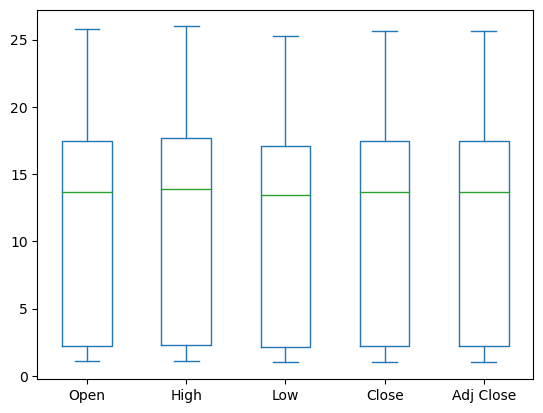

In [9]:
# boxplot to visually check our outliers

# tesla.columns
tesla[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind="box")

In [10]:
# setting the layout for our plot

layout = go.Layout(
    title = "Stock Price of Tesla",
    xaxis = dict(title = "Date", titlefont = dict( family = "Courier New, monospace", size = 18, color = "#7f7f7f")),
    yaxis = dict(title = "Price", titlefont = dict( family = "Courier New, monospace", size = 18, color = "#7f7f7f"))
)

tesla_data = [{"x" : tesla["Date"], "y" : tesla["Close"]}]
plot = go.Figure(data = tesla_data, layout = layout)

iplot(plot)

In [11]:
# Bulding the Regression model

from sklearn.model_selection import train_test_split


# for processing

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# for model evaluation

from sklearn.metrics import  mean_squared_error as mse
from sklearn.metrics import  r2_score

In [12]:
# split the data into train and test train sets

x = np.array(tesla.index).reshape(-1,1)
y = tesla['Close']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [13]:
# feature scaling
scaler = StandardScaler().fit(x_train)

In [14]:
# create linear model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [15]:
#plot actual and pridicted values for train dataset

trace0 = go.Scatter(
    x = x_train.T[0],
    y = y_train,
    mode = "markers",
    name = "Actual"
)
trace1 = go.Scatter(
    x = x_train.T[0],
    y = lm.predict(x_train).T,
    mode = "lines",
    name = "Predicted"
)

tesla_data = [trace0,trace1]
layout.xaxis.title.text = "Day"
plot2 = go.Figure(data =  tesla_data, layout = layout)

iplot(plot2)

In [16]:
# calculating scores for model evaluation

score = f'''
    {'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
    {'r2_score'.ljust(10)}{r2_score(y_train, lm.predict(x_train))}\t{r2_score(y_test, lm.predict(x_test))}
    {'MSE'.ljust(10)}{mse(y_train, lm.predict(x_train))}\t{mse(y_test, lm.predict(x_test))} '''

print(score)


    Metric           Train                Test        
    r2_score  0.866041179617465	0.8604586021831004
    MSE       8.085245779473377	7.942221651964341 
